In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("flight_price.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


## 📍 Part 2: Data Cleaning and Preprocessing

In [7]:
# Convert date columns
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

# Extract new time features
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

# Duration to minutes
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '')
df['Duration'] = df['Duration'].apply(eval)

/tmp/ipython-input-3128922781.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
/tmp/ipython-input-3128922781.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [8]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

/tmp/ipython-input-2196182885.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})


## 📍 Part 3: Univariate Analysis

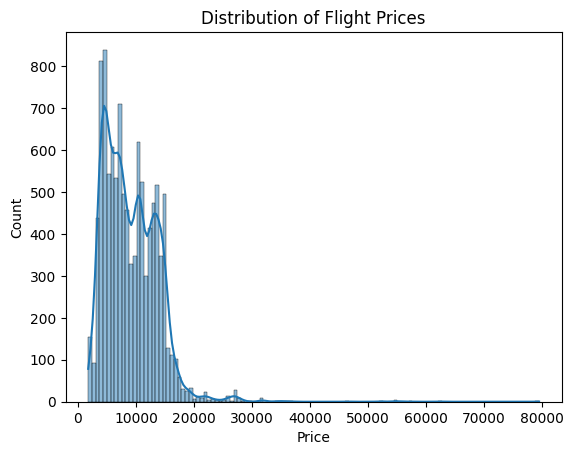

In [11]:
# Price distribution
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.show()

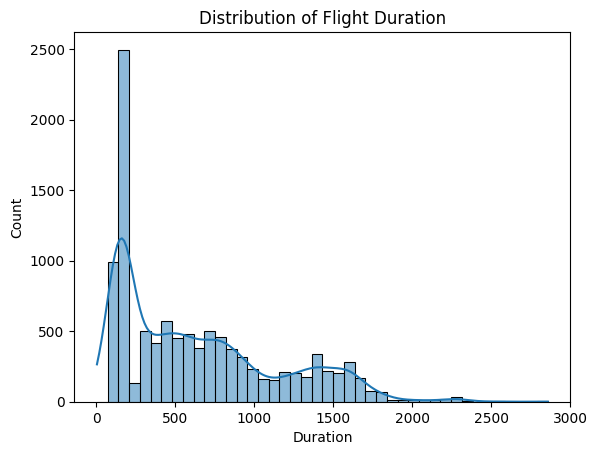

In [12]:
# Duration distribution
sns.histplot(df['Duration'], kde=True)
plt.title('Distribution of Flight Duration')
plt.show()

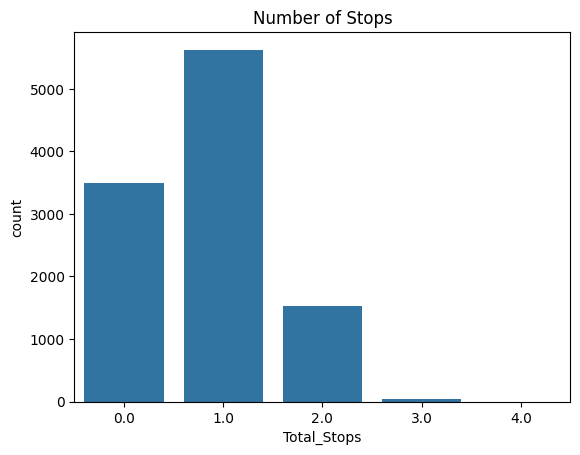

In [13]:
# Count of Total Stops
sns.countplot(x='Total_Stops', data=df)
plt.title('Number of Stops')
plt.show()

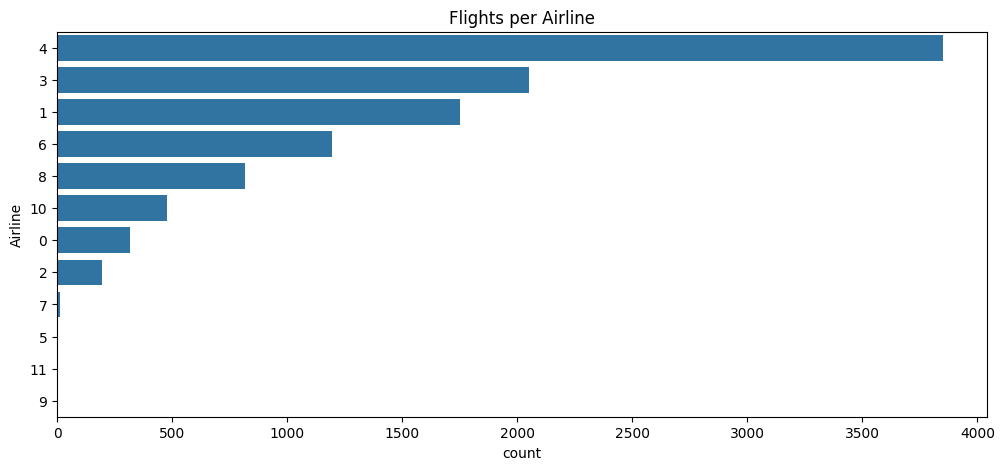

In [14]:
# Count plot of Airlines, Source, Destination
plt.figure(figsize=(12,5))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title('Flights per Airline')
plt.show()

## 📍 Part 4: Bivariate & Multivariate Analysis

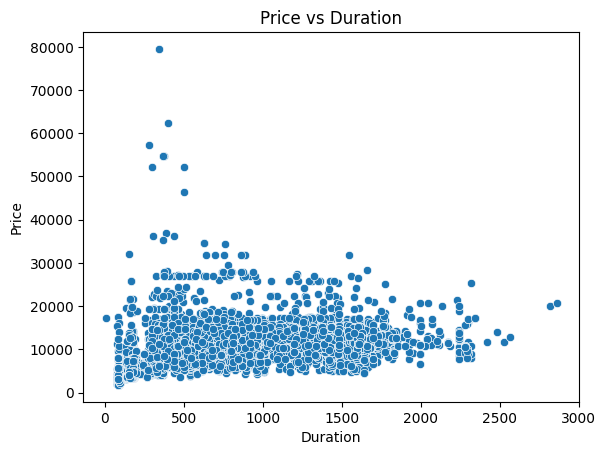

In [15]:
# Price vs Duration
sns.scatterplot(x='Duration', y='Price', data=df)
plt.title('Price vs Duration')
plt.show()

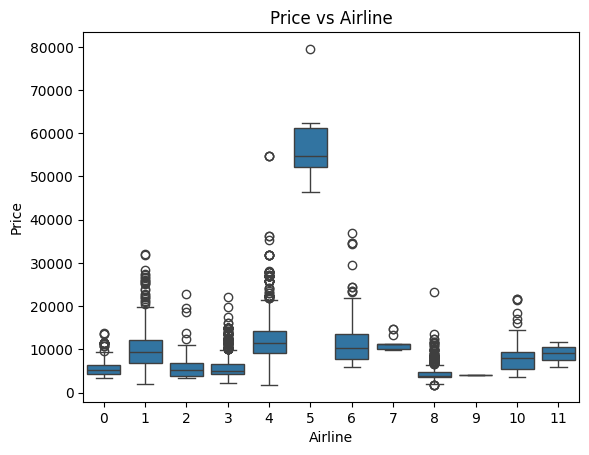

In [16]:
# Boxplot of Price by Airline
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Price vs Airline')
plt.show()

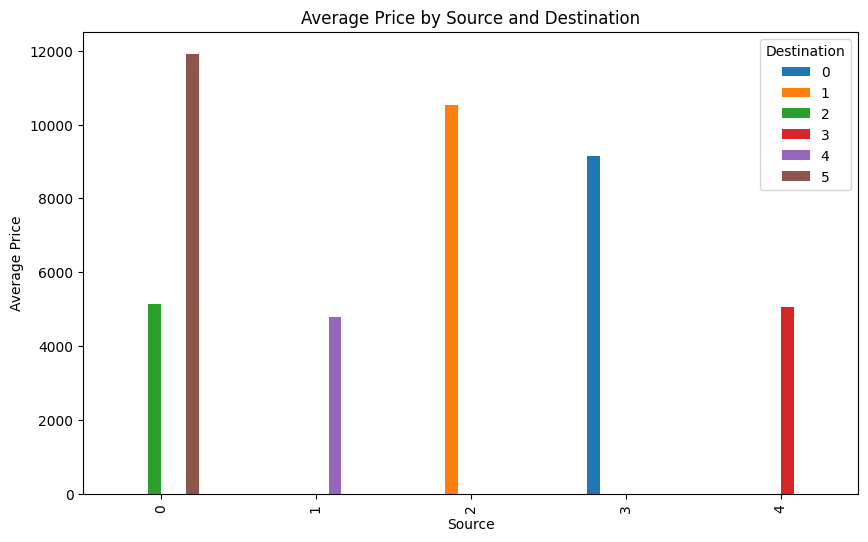

In [17]:
# Groupby Source-Destination and average price
df.groupby(['Source', 'Destination'])['Price'].mean().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Average Price by Source and Destination')
plt.ylabel('Average Price')
plt.show()

## 📍 Part 5: Feature Engineering (Bonus)

In [20]:
# Feature: Time of Day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Dep_Time_of_Day'] = df['Dep_Hour'].apply(time_of_day)

# Feature: Weekend
df['Weekday'] = df['Date_of_Journey'].dt.dayofweek
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Feature: Rush Hour (7-9 AM and 5-7 PM)
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if (7 <= x <= 9) or (17 <= x <= 19) else 0)

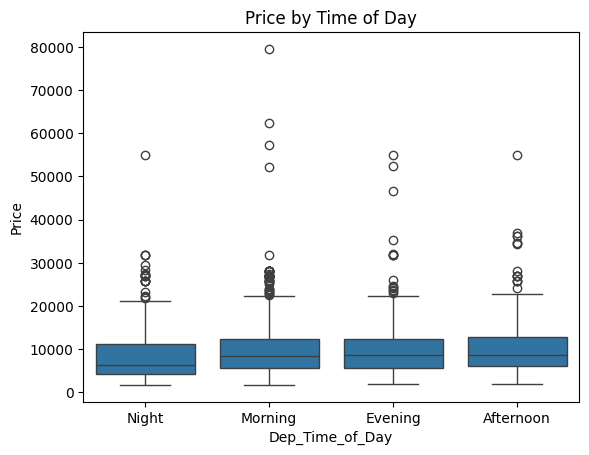

In [21]:
# Analyze new features
sns.boxplot(x='Dep_Time_of_Day', y='Price', data=df)
plt.title('Price by Time of Day')
plt.show()

## 📍 Part 6: Insights & Reporting

### 🔍 Top 5 Insights
1. Flights with more stops generally have higher prices.
2. Duration and price are moderately correlated.
3. Airlines show a wide variation in pricing.
4. Morning and night flights are generally cheaper.
5. Rush hour departures tend to be more expensive.

### 💡 Factors Influencing Flight Price
- Airline brand and service class.
- Time of the day and rush hour traffic.
- Number of stops.
- Day of travel (weekday vs weekend).

### ✈️ Suggestions for Travelers
- Prefer flights early morning or late night for cheaper fares.
- Avoid rush hours (7–9 AM, 5–7 PM) when possible.
- Choose airlines with consistent pricing history.